In [2]:
import pandas as pd
import seaborn as sb

from sklearn import tree #For our Decision Tree
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

In [3]:
data = pd.read_csv('Datos/train.csv')
data.dropna()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


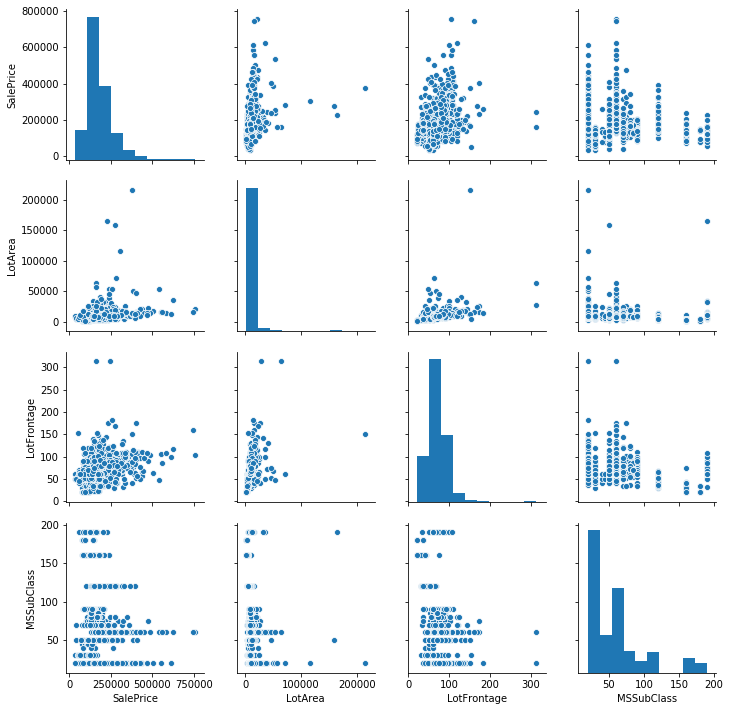

In [4]:
sb.pairplot(data,vars=["SalePrice","LotArea","LotFrontage","MSSubClass"])

In [ ]:
# Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
# I chose the variable name one_hot_data bescause in ML one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0)
one_hot_data = pd.get_dummies(data[ ['MSZoning', 'Temperature', 'Humidity', 'Windy'] ])
#print the new dummy data
one_hot_data